# Transformation Tasks

This notebook focuses on essential data transformation tasks to ensure data quality and prepare it for further analysis. We will cover the following:

- **Identifying and Handling Outliers:**
    - Calculate upper and lower bounds to detect outliers.
    - Identify and remove outliers from the dataset.
- **Log Transformation:**
    - Transform skewed data to reduce skewness and improve normality.
- **Data Scaling to Prepare Data for Further Analysis:**
    - Normalization: Scale data to a range of [0, 1].
    - Standardization: Scale data to have a mean of 0 and a standard deviation of 1.

These steps are crucial for preprocessing data in the ETL (Extract, Transform, Load) process, ensuring that the data is ready for analysis and modeling.

## Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler # For Data Scaling: Normalisation and Standardization

In [ ]:
funct_nmae(inputs)

## Load the users_data_final dataset

- Read the `users_data_final.pkl` file and store it as the variable `users_data`.

In [2]:
users_data = pd.read_pickle("users_data_final.pkl")
users_data.head(2)

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.0,58,management,married,tertiary,False,True,False,None,261,1,-1,0,None,False,1998-08-23,mobile
1,bb92765a-08de-4963-b432-496524b39157,NaN,NaN,44,technician,single,secondary,False,True,False,None,151,1,-1,0,None,False,2008-07-15,desktop


## Identifying and handling Outliers

- Check the distribution of the `number_transactions` variable

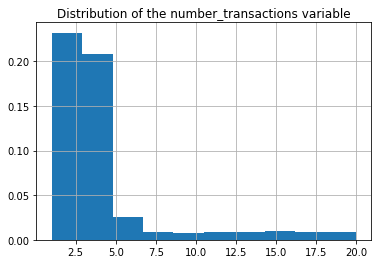

In [9]:
users_data.number_transactions.hist()
plt.title("Distribution of the number_transactions variable")
plt.show()

=> This hisogram will help us understand if the data is normal or skewed

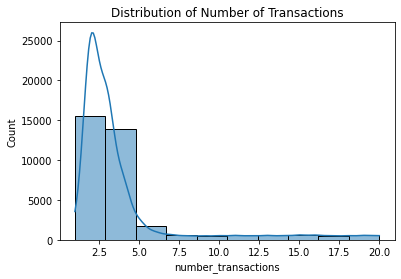

In [31]:
sns.histplot(users_data['number_transactions'], bins=10, kde=True)
plt.title('Distribution of Number of Transactions')
plt.show()

In [11]:
# Is it normal or skewed?

- Calculate the outliers for the variable `number_transactions`

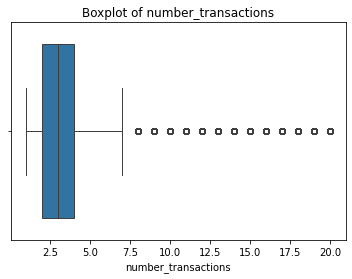

In [15]:
# check the visualisation to see if outliers exist
sns.boxplot(x = users_data.number_transactions)
plt.title('Boxplot of number_transactions')
plt.show()

In [14]:
# Calculation the first and Third Quartile
Q1 = users_data['number_transactions'].quantile(0.25)
Q3 = users_data['number_transactions'].quantile(0.75)

# Clacluate the IterQuartil
IQR = Q3 - Q1

# Calculate the Lower Bound
Lower_Bound = Q1 - 1.5 * IQR

# Calculate the Upper Bound
Upper_Bound = Q3 + 1.5 * IQR

print("The lower bound is:", Lower_Bound)
print("The upper bound is:", Upper_Bound)

The lower bound is: -1.0
The upper bound is: 7.0


### Identify potential outliers data 

In [17]:
print(f"Outliers for number_transactions variable are Values below {Lower_Bound} and above {Upper_Bound}")

Outliers for number_transactions variable are Values below -1.0 and above 7.0


#### Activity: Can you create a definition that will calculate the upper and lower bound for any skewed variable?

In [54]:
def identify_upper_and_lower_bound(data, variable):
    Q1 = data[variable].quantile(0.25)
    Q3 = data[variable].quantile(0.75)
    IQR = Q3 - Q1
    Lower_Bound = Q1 - 1.5 * IQR
    Upper_Bound = Q3 + 1.5 * IQR
    return Lower_Bound, Upper_Bound

In [55]:
# Example usage:
Lower_Bound_nt, Upper_Bound_nt = identify_upper_and_lower_bound(users_data, 'number_transactions')
print("The lower bound is:", Lower_Bound_nt)
print("The upper bound is:", Upper_Bound_nt)

The lower bound is: -1.0
The upper bound is: 7.0


=> This function can be reused for any variable in your dataset

#### Activity: Identify and remove outliers from number_transactions in `user_data_final.pkl`

- How many values are above the Upper Bound?

In [56]:
upper_outliers = users_data[users_data['number_transactions'] > Upper_Bound_nt]
len(upper_outliers)
# 3716 cases

3716

- How many values are below the Lower Bound?

In [22]:
lower_outliers = users_data[users_data['number_transactions'] < Lower_Bound_nt]
len(lower_outliers)
# 0 cases

0

- (Optional) Remove all cases of `number_transactions` that have been identified as outliers, and store this as variable `users_data_transformed`

In [24]:
users_data_transformed = users_data[(users_data['number_transactions'] >= Lower_Bound) & 
                                    (users_data['number_transactions'] <= Upper_Bound)]

In [25]:
users_data_transformed.shape

(31494, 19)

## Log-Transformation

#### OPTIONAL Activity: Use Log-Transformation to transform a skewed variable

In [26]:
users_data['log_number_transactions'] = np.log(users_data['number_transactions'] + 1) # Adding 1 to avoid log(0)
users_data.head(3)

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device,log_number_transactions
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.0,58,management,married,tertiary,False,True,False,None,261,1,-1,0,None,False,1998-08-23,mobile,1.386294
1,bb92765a-08de-4963-b432-496524b39157,NaN,NaN,44,technician,single,secondary,False,True,False,None,151,1,-1,0,None,False,2008-07-15,desktop,NaN
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.0,33,entrepreneur,married,secondary,False,True,True,None,76,1,-1,0,None,False,2002-06-04,mobile,1.098612


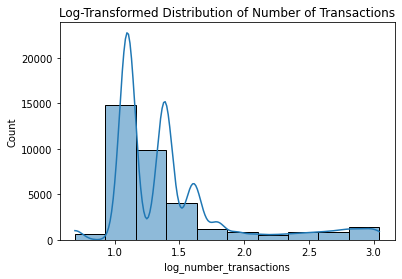

In [30]:
sns.histplot(users_data['log_number_transactions'], bins = 10, kde=True)
plt.title('Log-Transformed Distribution of Number of Transactions')
plt.show()

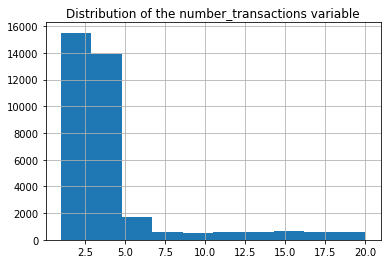

In [45]:
users_data.number_transactions.hist()
plt.title("Distribution of the number_transactions variable")
plt.show()

=> Log transformation helps in reducing the skewness of the data

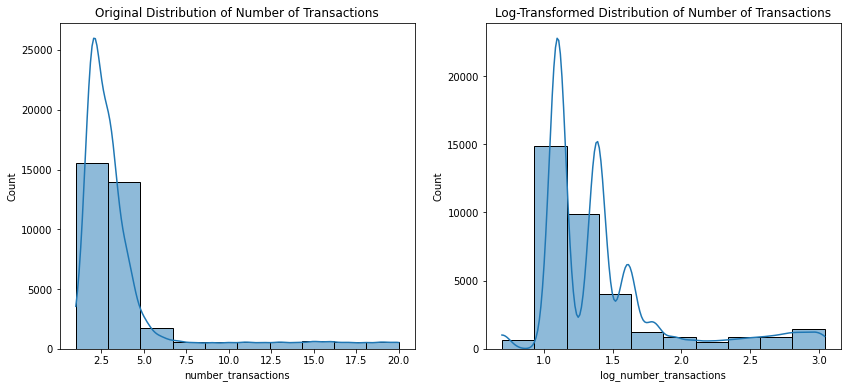

In [47]:
# Plot the original and log-transformed distributions
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Original distribution
sns.histplot(users_data['number_transactions'], bins=10, kde=True, ax=axs[0])
axs[0].set_title('Original Distribution of Number of Transactions')

# Log-transformed distribution
sns.histplot(users_data['log_number_transactions'], bins=10, kde=True, ax=axs[1])
axs[1].set_title('Log-Transformed Distribution of Number of Transactions')

plt.show()

## Data Scaling

- Using Normalisation

In [32]:
scaler = MinMaxScaler()
users_data['number_transactions_normalized'] = scaler.fit_transform(users_data[['number_transactions']])

In [44]:
users_data[['number_transactions','number_transactions_normalized']].describe()

,number_transactions,number_transactions_normalized
count,35210.000000,35210.000000
mean,3.977052,0.156687
std,3.814329,0.200754
min,1.000000,0.000000
25%,2.000000,0.052632
50%,3.000000,0.105263
75%,4.000000,0.157895
max,20.000000,1.000000


- Using Standardisation

In [40]:
scaler = StandardScaler()
users_data['number_transactions_standardized'] = scaler.fit_transform(users_data[['number_transactions']])

In [43]:
users_data[['number_transactions','number_transactions_standardized']].describe()

,number_transactions,number_transactions_standardized
count,35210.000000,3.521000e+04
mean,3.977052,5.166116e-17
std,3.814329,1.000014e+00
min,1.000000,-7.805027e-01
25%,2.000000,-5.183297e-01
50%,3.000000,-2.561567e-01
75%,4.000000,6.016354e-03
max,20.000000,4.200785e+00


Normalization scales the data to a range of [0, 1], while standardization scales the data to have a mean of 0 and a standard deviation of 1.*